# **Loading dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
df=pd.read_csv("/content/Housing_price.csv")

In [5]:
df.head()

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
df.tail()

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address
4543,84556.63627,5.092459,6.723412,2.42,31797.31744,1326846.699,"97160 Tracy Junction\nErinborough, WY 73884"
4544,82732.98111,5.332712,6.198476,3.49,41136.52722,1252663.621,"0630 Wilson Shoal\nNorth Philip, AK 91611"
4545,65694.05127,6.436741,6.704929,3.14,43406.71203,1359762.694,"PSC 2681, Box 5759\nAPO AA 82431-2879"
4546,76061.35071,7.148713,7.546066,6.30,40876.96459,1778013.334,"04117 Bennett Greens\nGonzalezfort, NJ 86640-8362"
4547,66935.47508,6.376390,8.513826,5.47,17573.61710,1109059.054,55454 M


In [7]:
df.dtypes

Avg. Area Income      float64
House Age             float64
Number of Rooms       float64
Number of Bedrooms    float64
Area Population       float64
Price                 float64
Address                object
dtype: object

In [8]:
df=df.drop(['Address'],axis=1)

In [9]:
df.describe()

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
count,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4.548000e+03
mean,68611.700818,5.978918,6.987646,3.981693,36187.469334,1.233916e+06
std,10686.487761,0.990850,1.006587,1.230939,9910.189915,3.545676e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61485.150192,5.332187,6.299692,3.140000,29423.163510,9.977751e+05
50%,68817.036575,5.960872,7.002245,4.050000,36215.560985,1.234571e+06
75%,75820.741747,6.658368,7.665871,4.490000,42880.554642,1.470616e+06
max,107701.748400,9.519088,10.759588,6.500000,69592.040240,2.469066e+06


In [10]:
df.count()

Avg. Area Income      4548
House Age             4548
Number of Rooms       4548
Number of Bedrooms    4548
Area Population       4548
Price                 4548
dtype: int64

In [12]:
x=df.drop(['Price'],axis=1)
y=df['Price']

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=92)

# **Model Selection**

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr=LinearRegression()

In [22]:
lr.fit(x_train,y_train)

LinearRegression()

# **Model Testing**

In [24]:
prediction=lr.predict(x_test)
prediction

array([1131610.63964872,  858017.26545187, 1971630.14504898, ...,
       1480979.93858469, 1391344.8971159 , 2078305.66618486])

In [26]:
print(lr.coef_)

[2.15852526e+01 1.65174737e+05 1.20299247e+05 1.15214640e+03
 1.53315421e+01]


In [27]:
print(lr.intercept_)

-2633020.719689719


In [32]:
pd.DataFrame(lr.coef_,x.columns,columns=['coef'])

,coef
Avg. Area Income,21.585253
House Age,165174.736579
Number of Rooms,120299.246986
Number of Bedrooms,1152.146395
Area Population,15.331542


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['coef'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['coef'], **{})
chart

# **visualization**

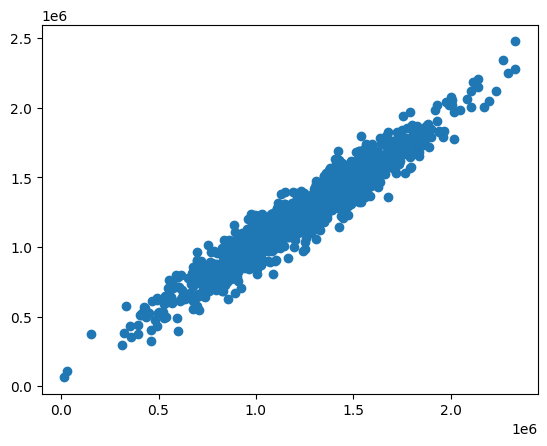

In [25]:
plt.scatter(y_test,prediction)

(array([ 16.,  71., 139., 225., 266., 219., 130.,  47.,  19.,   5.]),
 array([-268339.11085506, -209604.10301102, -150869.09516699,
         -92134.08732296,  -33399.07947892,   25335.92836511,
          84070.93620915,  142805.94405318,  201540.95189721,
         260275.95974125,  319010.96758528]),
 <BarContainer object of 10 artists>)

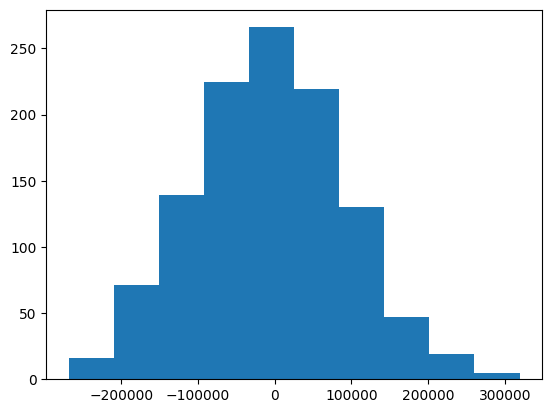

In [34]:
plt.hist(y_test-prediction)

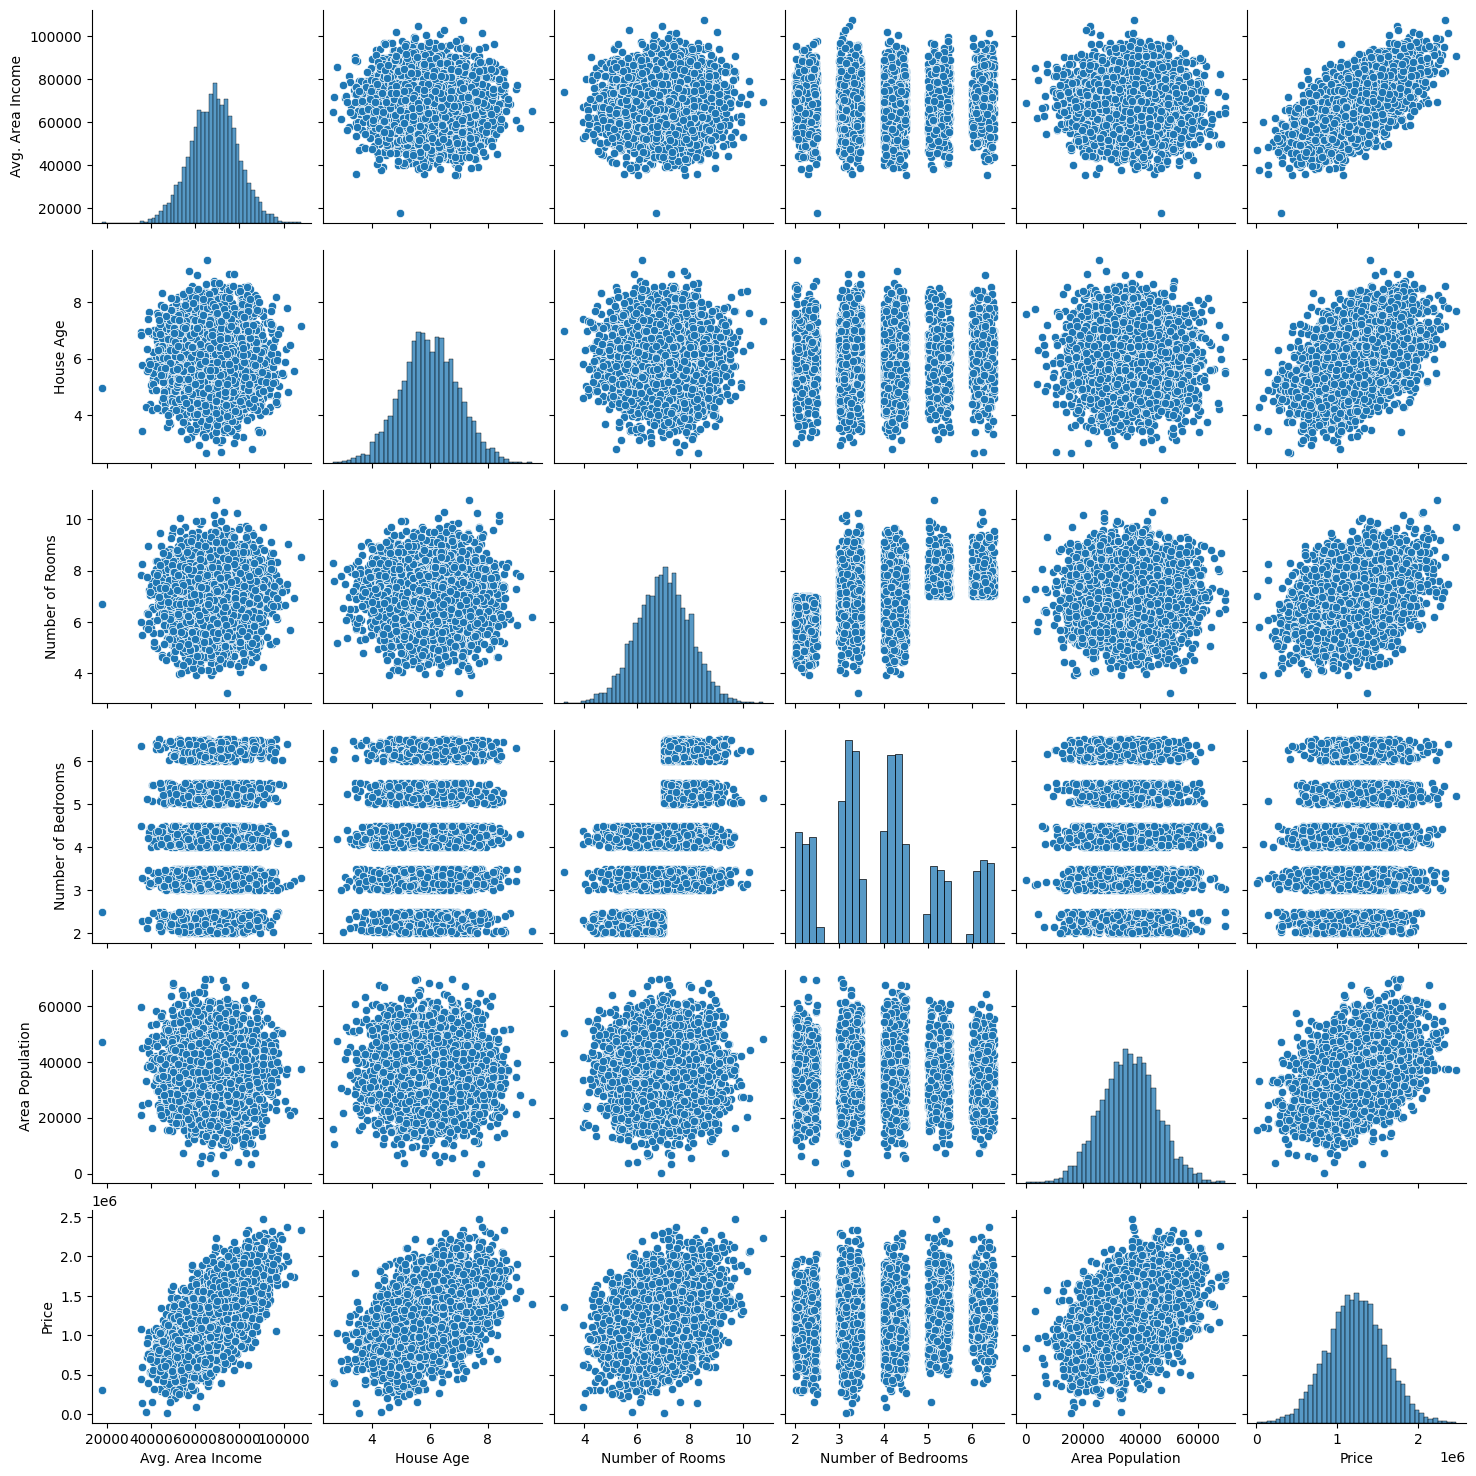

In [37]:
sns.pairplot(df)

# **Loss Function**

In [40]:
from sklearn import metrics

In [41]:
metrics.mean_absolute_error(y_test,prediction)

79041.2254216665

In [42]:
metrics.mean_squared_error(y_test,prediction)

9736558003.713934

In [43]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

98673.9986202745